In [1]:
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
import seaborn as sns
from ast import literal_eval
from sklearn.cluster import KMeans
import ast
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data file
def read_csv(filename):
    #read in the csv file
    df = pd.read_csv(filename)
    
    #return the dataframe
    return df

df = read_csv("dataset_for_analyst_assignment_20201120.csv")

In [3]:
#Checking the first few observations in the dataframe
df.head()

#GETTING TO KNOW THE DATA SET

df.size #Number of attributes and number of observations

df.info #Brief idea about the data set

df.columns #The attributes that in consideration

nan_count = df.isna().sum() #Checking the number of Nan values in each column
print(nan_count)

result = df.dtypes
print(result)

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [4]:
## DATA PREPROCESSING FOR CUSTOMER SEGMENTATION


#Re-arranging the Purchase count by store type column
def rearrange_columns(df,col):
    # drop next line char
    df[col] = df[col].str.replace('\n', '')

    # change to srt and then to dic
    df[col] = df[col].astype('str')
    df[col] = df[col].apply(lambda x: ast.literal_eval(x))
    df2 = df[col].apply(pd.Series)
    return df2 

df2 = rearrange_columns(df,"PURCHASE_COUNT_BY_STORE_TYPE")

In [5]:
# join tables and drop initial column
def joining_the_df(df,df2,col):
    df3 = df.join(df2)
    df3 = df3.drop(col, axis=1)

    return df3
    
    
df3 = joining_the_df(df,df2,"PURCHASE_COUNT_BY_STORE_TYPE")

In [6]:
#Removing the un-wanted delimiters from the data respect to specific columns
def remove_delimiter(df,col):
    df[col] = df[col].str.replace('[', '')
    df[col] = df[col].str.replace('"', '')
    df[col] = df[col].str.replace(']', '')
    
    return df

df4 = remove_delimiter(df3,"PREFERRED_RESTAURANT_TYPES")

In [7]:
#Re-arranging the Preffered_Restaurant_Types column
def rearrange_col2(df):
    DF = df4.PREFERRED_RESTAURANT_TYPES
    B = pd.DataFrame(DF)
    C = B.fillna('NAN')
    A = C["PREFERRED_RESTAURANT_TYPES"]
    data =  {'AMERICAN':[1 if 'american' in x else 0 for x in A],
            'CHINESE':[1 if 'chinese' in x else 0 for x in A],
            'JAPANESE':[1 if 'japanese' in x else 0 for x in A],
            'ITALIAN':[1 if 'italian' in x else 0 for x in A],
            'HAWAIIAN':[1 if 'hawaiian' in x else 0 for x in A],
            'INDIAN':[1 if 'indian' in x else 0 for x in A],
            'MEXICAN':[1 if 'mexican' in x else 0 for x in A],
            'NEPALESE':[1 if 'nepalese' in x else 0 for x in A],
            'KOREAN':[1 if 'korean' in x else 0 for x in A],
            'MIDDLE_EASTERN':[1 if 'middle eastern' in x else 0 for x in A],
            'THAI':[1 if 'thai' in x else 0 for x in A],
            'VIETNAMESE':[1 if 'vietnamese' in x else 0 for x in A],
            'GREEK':[1 if 'greek' in x else 0 for x in A],}
    df_res = pd.DataFrame(data)
    return(df_res)

DF_RES = rearrange_col2(df4) #Data set with Restaurant Types

df5 = joining_the_df(df4,DF_RES,"PREFERRED_RESTAURANT_TYPES")

In [8]:
# Extracting the Yesr for Registration Date
def Extracting_REG_DATE(df,col):
    df[col] = pd.to_datetime(df[col])
    df[col] = df[col].dt.day


Extracting_REG_DATE(df5,"REGISTRATION_DATE")

In [9]:
# Re-Calculating the AVG_DAYS_BETWEEN_PURCHASES
def AVG_DAYS_BTW_PUR(df,col1,col2):
    df[col1] = pd.to_datetime(df[col1])
    df[col2] = pd.to_datetime(df[col2])
    df.loc[df[col1].isnull(), "AVG_DAYS_BETWEEN_PURCHASES"] = 0
    df.loc[df[col1].notnull(), "AVG_DAYS_BETWEEN_PURCHASES"] = ((df[col2]- df[col1]).dt.days)/df["PURCHASE_COUNT"]
    df["AVG_DAYS_BETWEEN_PURCHASES"] = df["AVG_DAYS_BETWEEN_PURCHASES"].apply(np.ceil)


AVG_DAYS_BTW_PUR(df5,"FIRST_PURCHASE_DAY","LAST_PURCHASE_DAY")

In [10]:
# Extracting the Year, Month and Day from First Purchase Date
def Splitting_FIRST_PURCAHSE_DATE(df,col):
    df['FIRST_PURCHASE_YEAR'] = df[col].dt.year
    df['FIRST_PURCHASE_MONTH'] = df[col].dt.month
    df['FIRST_PURCHASE_DATE'] = df[col].dt.day
    del df[col]
    
Splitting_FIRST_PURCAHSE_DATE(df5,"FIRST_PURCHASE_DAY")

In [11]:
# Extracting the Year, Month and Day from Last Purchase Date
def Splitting_LAST_PURCAHSE_DATE(df,col):
    df[col] = pd.to_datetime(df[col])
    df['LAST_PURCHASE_YEAR'] = df[col].dt.year
    df['LAST_PURCHASE_MONTH'] = df[col].dt.month
    df['LAST_PURCHASE_DATE'] = df[col].dt.day
    del df[col]
    
Splitting_LAST_PURCAHSE_DATE(df5,"LAST_PURCHASE_DAY")

In [12]:
#Treating the categorical data
def Identifying_uniqueValues(df,col):
    df[col] = df[col].astype("category")
    print(df[col].cat.categories)
    
Identifying_uniqueValues(df5,"REGISTRATION_COUNTRY")

Identifying_uniqueValues(df5,"PREFERRED_DEVICE")

Index(['ARE', 'AUS', 'AUT', 'AZE', 'BEL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'FRO',
       'GBR', 'GEO', 'GIN', 'GRC', 'HKG', 'HRV', 'HUN', 'IND', 'IRL', 'ISL',
       'ISR', 'ITA', 'JOR', 'JPN', 'KOR', 'KWT', 'LBN', 'LTU', 'LVA', 'MEX',
       'MLT', 'NLD', 'NOR', 'PAK', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS',
       'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'UKR', 'USA'],
      dtype='object')
Index(['android', 'ios', 'web'], dtype='object')


In [13]:
# Assigning a numerical values for Categories - Country
def Country_Category(df,col):
    df["REG_COUNTRY"] = df[col].map({
        "ARE": 1, "AUS": 2, "AUT": 3, "AZE": 4, "BEL": 5, "BRA": 6, "CAN": 7, 
        "CHE": 8, "CHL": 9, "CHN": 10, "COL": 11, "CYP": 12, "CZE": 13, "DEU": 14,
        "DNK": 15, "ESP": 16, "EST": 17, "FIN": 18, "FRA": 19, "FRO": 20, "GBR": 21,
        "GEO": 22, "GIN": 23, "GRC": 24, "HKG": 25, "HRV": 26, "HUN": 27, "IND": 28,
        "IRL": 29, "ISL": 30, "ISR": 31, "ITA": 32, "JOR": 33, "JPN": 34, "KOR": 35,
        "KWT": 36, "LBN": 37, "LTU": 38, "LVA": 39, "MEX": 40, "MLT": 41, "NLD": 42,
        "NOR": 43, "PAK": 44, "PHL": 45, "POL": 46, "PRT": 47, "QAT": 48, "ROU": 49,
        "RUS": 50, "SAU": 51, "SGP": 52, "SVK": 53, "SVN": 54, "SWE": 55, "TUR": 56,
        "TWN": 50, "UKR": 51, "USA": 52})
    del df[col]
    return df

Country_Category(df5,"REGISTRATION_COUNTRY")

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,...,THAI,VIETNAMESE,GREEK,FIRST_PURCHASE_YEAR,FIRST_PURCHASE_MONTH,FIRST_PURCHASE_DATE,LAST_PURCHASE_YEAR,LAST_PURCHASE_MONTH,LAST_PURCHASE_DATE,REG_COUNTRY
0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15
1,1,1,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,...,0,0,0,2020.0,9.0,2.0,2020.0,9.0,2.0,18
2,1,19,19.0,0.0,3,0.0,4.0,1.0,14.0,0.0,...,0,0,0,2019.0,12.0,10.0,2020.0,5.0,25.0,15
3,1,0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,18
4,1,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,30,1,1.0,0.0,21979,0.0,0.0,1.0,0.0,0.0,...,0,0,0,2020.0,1.0,23.0,2020.0,1.0,23.0,24
21979,30,0,NaN,NaN,21980,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,24
21980,30,0,NaN,NaN,21981,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15
21981,30,0,NaN,NaN,21982,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15


In [14]:
# Assigning a numerical values for Categories - Preferred Device
def Device_Category(df,col):
    df["DEVICE"] = df[col].map({
        "android": 1, "ios": 2, "web": 3})
    del df[col]
    return df

Device_Category(df5,"PREFERRED_DEVICE")

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,...,VIETNAMESE,GREEK,FIRST_PURCHASE_YEAR,FIRST_PURCHASE_MONTH,FIRST_PURCHASE_DATE,LAST_PURCHASE_YEAR,LAST_PURCHASE_MONTH,LAST_PURCHASE_DATE,REG_COUNTRY,DEVICE
0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15,2
1,1,1,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,...,0,0,2020.0,9.0,2.0,2020.0,9.0,2.0,18,1
2,1,19,19.0,0.0,3,0.0,4.0,1.0,14.0,0.0,...,0,0,2019.0,12.0,10.0,2020.0,5.0,25.0,15,1
3,1,0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,18,1
4,1,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,30,1,1.0,0.0,21979,0.0,0.0,1.0,0.0,0.0,...,0,0,2020.0,1.0,23.0,2020.0,1.0,23.0,24,1
21979,30,0,NaN,NaN,21980,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
21980,30,0,NaN,NaN,21981,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15,1
21981,30,0,NaN,NaN,21982,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15,2


In [15]:
# Assigning a numerical values for Categories - User Valid Payment Method
def Payment_Category(df):
    df["PAYMENT"] = df.USER_HAS_VALID_PAYMENT_METHOD.replace({True: 1, False: 0})
    del df["USER_HAS_VALID_PAYMENT_METHOD"]
    return df

Payment_Category(df5)

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,...,GREEK,FIRST_PURCHASE_YEAR,FIRST_PURCHASE_MONTH,FIRST_PURCHASE_DATE,LAST_PURCHASE_YEAR,LAST_PURCHASE_MONTH,LAST_PURCHASE_DATE,REG_COUNTRY,DEVICE,PAYMENT
0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,15,2,0
1,1,1,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,...,0,2020.0,9.0,2.0,2020.0,9.0,2.0,18,1,0
2,1,19,19.0,0.0,3,0.0,4.0,1.0,14.0,0.0,...,0,2019.0,12.0,10.0,2020.0,5.0,25.0,15,1,1
3,1,0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,18,1,0
4,1,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,30,1,1.0,0.0,21979,0.0,0.0,1.0,0.0,0.0,...,0,2020.0,1.0,23.0,2020.0,1.0,23.0,24,1,0
21979,30,0,NaN,NaN,21980,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,0
21980,30,0,NaN,NaN,21981,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,15,1,0
21981,30,0,NaN,NaN,21982,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,15,2,0


In [16]:
#Removing the registered customers that was not made a single order
def remove_zero_rows_purchase(df, col):
    #remove rows with zero values in the specified column
    df = df[df[col]!= 0]
      
    #return the data frame
    return df

df6 = remove_zero_rows_purchase(df5,"PURCHASE_COUNT")  

In [17]:
nan_count6 = df6.isna().sum() #Checking the number of Nan values in each column
print(nan_count6)


#Deleting the columns that has a significant missing values
def Deleting_Attributes(df,col):
    del df[col]
    return df

Deleting_Attributes(df6,"MEDIAN_DAYS_BETWEEN_PURCHASES")

REGISTRATION_DATE                             0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
USER_ID                                       0
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
IOS_PURCHASES                                 0
WEB_PURCHASES                                 0
ANDROID_PURCHASES                             0
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE       0
MOST_COMMON_WEEKDAY_TO_PURCHASE               0
AVG_DAYS_BETWEEN_PURCHASES              

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,...,GREEK,FIRST_PURCHASE_YEAR,FIRST_PURCHASE_MONTH,FIRST_PURCHASE_DATE,LAST_PURCHASE_YEAR,LAST_PURCHASE_MONTH,LAST_PURCHASE_DATE,REG_COUNTRY,DEVICE,PAYMENT
1,1,1,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,...,0,2020.0,9.0,2.0,2020.0,9.0,2.0,18,1,0
2,1,19,19.0,0.0,3,0.0,4.0,1.0,14.0,0.0,...,0,2019.0,12.0,10.0,2020.0,5.0,25.0,15,1,1
7,1,1,1.0,0.0,8,0.0,0.0,1.0,0.0,0.0,...,0,2020.0,10.0,14.0,2020.0,10.0,14.0,18,1,1
12,1,19,19.0,0.0,13,0.0,8.0,0.0,11.0,0.0,...,0,2020.0,4.0,18.0,2020.0,10.0,27.0,18,2,1
13,1,2,2.0,0.0,14,0.0,1.0,1.0,0.0,0.0,...,0,2020.0,8.0,21.0,2020.0,9.0,9.0,18,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,30,1,1.0,0.0,21974,0.0,0.0,0.0,1.0,0.0,...,0,2020.0,10.0,15.0,2020.0,10.0,15.0,18,1,0
21975,30,4,4.0,0.0,21976,2.0,2.0,0.0,0.0,0.0,...,0,2020.0,4.0,11.0,2020.0,4.0,27.0,24,1,1
21976,30,1,1.0,0.0,21977,0.0,0.0,1.0,0.0,0.0,...,0,2019.0,10.0,3.0,2019.0,10.0,3.0,15,1,0
21978,30,1,1.0,0.0,21979,0.0,0.0,1.0,0.0,0.0,...,0,2020.0,1.0,23.0,2020.0,1.0,23.0,24,1,0


In [18]:
# Replacing the Nan values with 0
def ReplaceNan(df):
    df6 = df.replace(np.nan, 0) #Replacing it with 0 for a better meaning
    
    return df6

df7 = ReplaceNan(df6)

In [19]:
##DATA PREPROCESSING FOR EXPLORATORY DATA ANALYSIS (Using the Categories as it is)


df5E = joining_the_df(df4,DF_RES,"PREFERRED_RESTAURANT_TYPES") 

Extracting_REG_DATE(df5E,"REGISTRATION_DATE")

AVG_DAYS_BTW_PUR(df5E,"FIRST_PURCHASE_DAY","LAST_PURCHASE_DAY")

Splitting_FIRST_PURCAHSE_DATE(df5E,"FIRST_PURCHASE_DAY")

Splitting_LAST_PURCAHSE_DATE(df5E,"LAST_PURCHASE_DAY")

df6E = remove_zero_rows_purchase(df5E,"PURCHASE_COUNT")  

Deleting_Attributes(df6E,"MEDIAN_DAYS_BETWEEN_PURCHASES")

df7E = ReplaceNan(df6E)

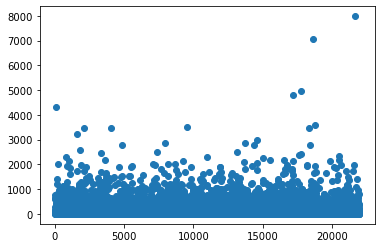

In [20]:
# Checking the outliers through scatter plot..
plt.scatter(df7["USER_ID"], df7["TOTAL_PURCHASES_EUR"])
plt.show() 

In [21]:
# As per the scatter plot, there are two outliers, hence it will be removed from the data set
df7.drop(index=21702, inplace=True) 
df7.drop(index=18672, inplace=True) 

df7E.drop(index=21702, inplace=True) 
df7E.drop(index=18672, inplace=True) 


In [22]:
## EXPLORATORY DATA ANALYSIS....
a= df7E[["TOTAL_PURCHASES_EUR","USER_ID","REGISTRATION_COUNTRY", "USER_HAS_VALID_PAYMENT_METHOD", "PURCHASE_COUNT","PREFERRED_DEVICE", "AVERAGE_DELIVERY_DISTANCE_KMS"]] # See the most influent clients
influent_clients = a[a['TOTAL_PURCHASES_EUR'] >= 800]

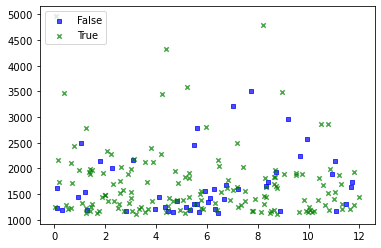

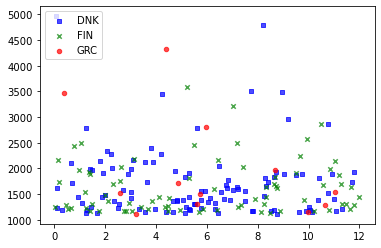

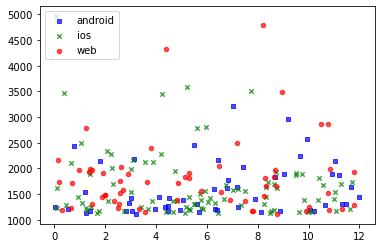

In [23]:
most_influent_clients = influent_clients.nlargest(200, "TOTAL_PURCHASES_EUR")

fig = category_scatter(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='TOTAL_PURCHASES_EUR', label_col='USER_HAS_VALID_PAYMENT_METHOD', 
                       data=most_influent_clients, legend_loc='upper left')

fig2 = category_scatter(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='TOTAL_PURCHASES_EUR', label_col='REGISTRATION_COUNTRY', 
                       data=most_influent_clients, legend_loc='upper left')

fig3 = category_scatter(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='TOTAL_PURCHASES_EUR', label_col='PREFERRED_DEVICE', 
                       data=most_influent_clients, legend_loc='upper left')

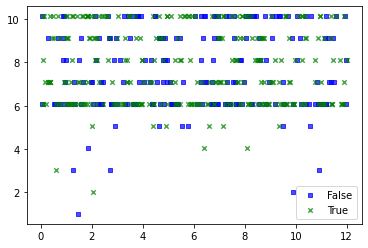

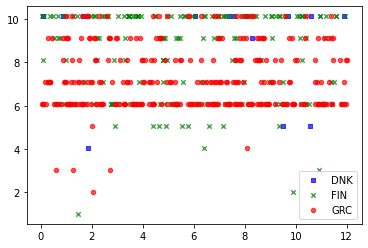

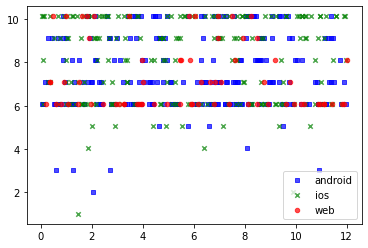

In [24]:
non_influential_clients = a[a['TOTAL_PURCHASES_EUR'] < 800] # See the most influent clients

non_influential_clients = non_influential_clients.nsmallest(500, "TOTAL_PURCHASES_EUR")


fig4 = category_scatter(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='TOTAL_PURCHASES_EUR', label_col='USER_HAS_VALID_PAYMENT_METHOD', 
                       data=non_influential_clients, legend_loc='lower right')


fig5 = category_scatter(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='TOTAL_PURCHASES_EUR', label_col='REGISTRATION_COUNTRY', 
                       data=non_influential_clients, legend_loc='lower right')

fig6 = category_scatter(x='AVERAGE_DELIVERY_DISTANCE_KMS', y='TOTAL_PURCHASES_EUR', label_col='PREFERRED_DEVICE', 
                       data=non_influential_clients, legend_loc='lower right')

In [25]:
df7E.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'AVERAGE_DELIVERY_DISTANCE_KMS', 'General merchandise', 'Grocery',
       'Pet supplies', 'Restaurant', 'Retail store', 'AMERICAN', 'CHINESE',
       'JAPANESE', 'ITALIAN', 'HAWAIIAN', 'INDIAN', 'MEXICAN', 'NEPALESE',
       'KOREAN', 'MIDDLE_EASTERN', 'THAI', 'VIETNAMESE', 'GREEK',
       'FIRST_PURCHASE_YEAR', 'FIRST_PURCHASE_MONTH', 

In [26]:
l = [i for i in range(1,107)]
gk = a.groupby(['PURCHASE_COUNT'])['PURCHASE_COUNT'].count()
gk = gk[gk>100]
gk1 = pd.DataFrame(gk)
gk1['PURCHASE_COUNT']
l1 =  [i for i in range(1,16)]

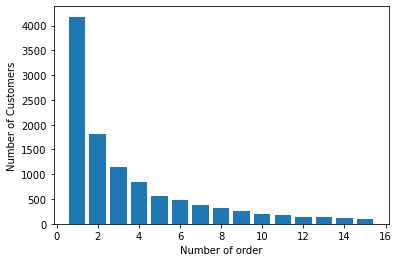

In [27]:
plt.bar(l1,gk)
plt.xlabel("Number of order")
plt.ylabel("Number of Customers")
plt.show()


In [28]:
# Meal orders distribution

DF = df7E[["BREAKFAST_PURCHASES", "LUNCH_PURCHASES", "EVENING_PURCHASES", "DINNER_PURCHASES", "LATE_NIGHT_PURCHASES"]]

In [29]:
DF_BREAKFAST = DF['BREAKFAST_PURCHASES'].sum()
DF_LUNCH = DF['LUNCH_PURCHASES'].sum()
DF_EVENING = DF['EVENING_PURCHASES'].sum()
DF_DINNER = DF['DINNER_PURCHASES'].sum()
DF_LATE_NIGHT = DF['EVENING_PURCHASES'].sum()

data = {'Meal':['Breakfast', 'Lunch', 'Evening_Snacks', 'Dinner' , 'Late_Night_Snacks'],'Total amount':[DF_BREAKFAST, DF_LUNCH, DF_EVENING, DF_DINNER, DF_LATE_NIGHT]} 
df_meal = pd.DataFrame(data) 
print(df_meal)


                Meal  Total amount
0          Breakfast        2326.0
1              Lunch       28449.0
2     Evening_Snacks        5933.0
3             Dinner       36327.0
4  Late_Night_Snacks        5933.0


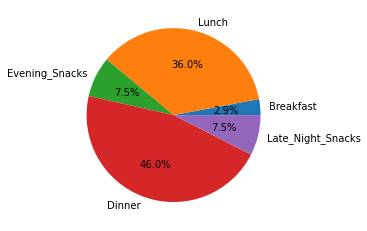

In [30]:
plt.pie(df_meal["Total amount"], labels = df_meal["Meal"], autopct='%.1f%%')
plt.show()

In [31]:
# Store preferrence of the customers
DF2 = df7E[['General merchandise', 'Grocery','Pet supplies', 'Restaurant', 'Retail store']]

In [32]:
Merchandise = DF2['General merchandise'].sum()
Grocery = DF2['Grocery'].sum()
Pet = DF2['Pet supplies'].sum()
Restaurant = DF2['Restaurant'].sum()
Retail = DF2['Retail store'].sum()

data2 = {'Store':['General merchandise', 'Grocery','Pet supplies', 'Restaurant', 'Retail store'],'Total Order':[Merchandise, Grocery, Pet, Restaurant, Retail]} 
df_store_type = pd.DataFrame(data2) 
print(df_store_type)

                 Store  Total Order
0  General merchandise         1442
1              Grocery        12597
2         Pet supplies          174
3           Restaurant        44575
4         Retail store        14518


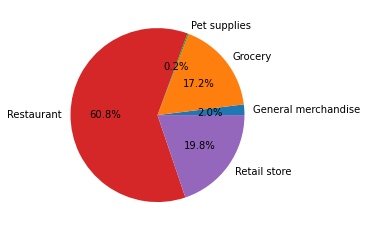

In [33]:
plt.pie(df_store_type["Total Order"], labels = df_store_type["Store"], autopct='%.1f%%')
plt.show()

In [34]:
# Cusine preferrence of the customers

DF3 = df7E[['AMERICAN', 'CHINESE','JAPANESE', 'ITALIAN', 'HAWAIIAN', 'INDIAN', 'MEXICAN', 'NEPALESE','KOREAN', 'MIDDLE_EASTERN', 'THAI', 'VIETNAMESE', 'GREEK']]

In [35]:
AMERICAN = DF3['AMERICAN'].sum()
CHINESE = DF3['CHINESE'].sum()
JAPANESE = DF3['JAPANESE'].sum()
ITALIAN = DF3['ITALIAN'].sum()
HAWAIIAN = DF3['HAWAIIAN'].sum()
INDIAN = DF3['INDIAN'].sum()
MEXICAN = DF3['MEXICAN'].sum()
NEPALESE = DF3['NEPALESE'].sum()
KOREAN = DF3['KOREAN'].sum()
MIDDLE_EASTERN = DF3['MIDDLE_EASTERN'].sum()
THAI = DF3['THAI'].sum()
VIETNAMESE = DF3['VIETNAMESE'].sum()
GREEK = DF3['GREEK'].sum()

data3 = {'Cuisine':['AMERICAN', 'CHINESE','JAPANESE', 'ITALIAN', 'HAWAIIAN', 'INDIAN', 'MEXICAN', 'NEPALESE','KOREAN', 'MIDDLE_EASTERN', 'THAI', 'VIETNAMESE', 'GREEK'],'Total Orders':[AMERICAN, CHINESE, JAPANESE, ITALIAN, HAWAIIAN, INDIAN, MEXICAN, NEPALESE, KOREAN, MIDDLE_EASTERN, THAI, VIETNAMESE, GREEK]} 
df_Cuisine = pd.DataFrame(data3) 
print(df_Cuisine)

           Cuisine  Total Orders
0         AMERICAN          1294
1          CHINESE            28
2         JAPANESE           653
3          ITALIAN           919
4         HAWAIIAN            24
5           INDIAN           229
6          MEXICAN           466
7         NEPALESE             6
8           KOREAN            49
9   MIDDLE_EASTERN           225
10            THAI            68
11      VIETNAMESE            53
12           GREEK            19


           Cuisine  Total Orders
0         AMERICAN          1294
3          ITALIAN           919
2         JAPANESE           653
6          MEXICAN           466
5           INDIAN           229
9   MIDDLE_EASTERN           225
10            THAI            68
11      VIETNAMESE            53
8           KOREAN            49
1          CHINESE            28
4         HAWAIIAN            24
12           GREEK            19
7         NEPALESE             6


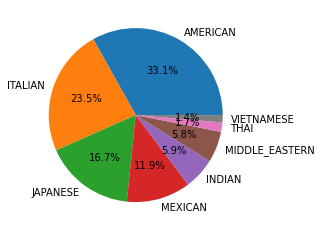

In [36]:
print(df_Cuisine.sort_values(by=['Total Orders'], ascending=False))
most_popular_cuisine = df_Cuisine.nlargest(8, "Total Orders")

plt.pie(most_popular_cuisine["Total Orders"], labels = most_popular_cuisine["Cuisine"], autopct='%.1f%%')
plt.show()

In [37]:
DF4 = df7E[['IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES']]

In [38]:
IOS = DF4['IOS_PURCHASES'].sum()
WEB = DF4['WEB_PURCHASES'].sum()
ANDROID = DF4['ANDROID_PURCHASES'].sum()


data4 = {'Device':['IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES'],'Total Order':[IOS, WEB, ANDROID]} 
df_device = pd.DataFrame(data4) 
print(df_device)

              Device  Total Order
0      IOS_PURCHASES      34887.0
1      WEB_PURCHASES      12708.0
2  ANDROID_PURCHASES      25711.0


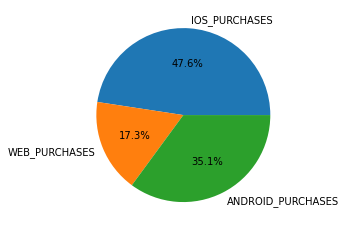

In [39]:
plt.pie(df_device["Total Order"], labels = df_device["Device"], autopct='%.1f%%')
plt.show()

REGISTRATION_COUNTRY
ARE       1
CAN       1
CYP       1
CZE       4
DEU       1
DNK    4985
EST      13
FIN    5449
FRA       2
GBR       2
GRC    1532
HRV       1
HUN       5
ISR       3
LTU       2
LVA       3
NOR      13
POL       4
SWE       4
Name: REGISTRATION_COUNTRY, dtype: int64


<AxesSubplot:>

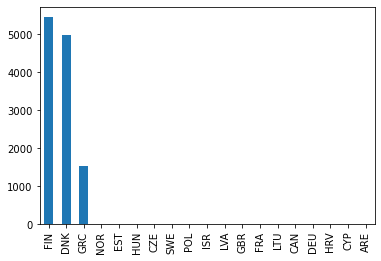

In [40]:
country = a.groupby(['REGISTRATION_COUNTRY'])['REGISTRATION_COUNTRY'].count()
print(country)
a['REGISTRATION_COUNTRY'].value_counts().plot(kind='bar')

<AxesSubplot:>

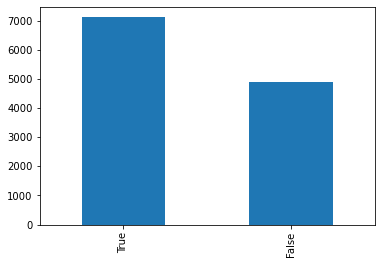

In [41]:
a['USER_HAS_VALID_PAYMENT_METHOD'].value_counts().plot(kind='bar')

In [42]:
## K - MEANS CLUSTERING
df7
df7.columns
corr = df7.corr()
corr.style.background_gradient(cmap='coolwarm') # Checking the correlation of the attributes to remove highly correlated data

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store,AMERICAN,CHINESE,JAPANESE,ITALIAN,HAWAIIAN,INDIAN,MEXICAN,NEPALESE,KOREAN,MIDDLE_EASTERN,THAI,VIETNAMESE,GREEK,FIRST_PURCHASE_YEAR,FIRST_PURCHASE_MONTH,FIRST_PURCHASE_DATE,LAST_PURCHASE_YEAR,LAST_PURCHASE_MONTH,LAST_PURCHASE_DATE,REG_COUNTRY,PAYMENT
REGISTRATION_DATE,1.000000,-0.002287,-0.002146,-0.001409,0.998441,-0.008649,0.001377,0.002805,-0.005747,nan,0.003724,-0.003054,0.017432,0.005890,0.015964,-0.011396,0.004890,0.005686,0.005249,0.010156,0.015491,0.007601,0.006425,-0.001311,-0.005217,-0.001735,-0.002797,-0.023114,0.003774,-0.025248,-0.012950,0.004308,-0.008952,-0.026331,-0.011877,-0.010949,-0.009242,-0.002746,-0.004035,-0.008575,-0.001188,0.001961,0.513640,-0.013335,-0.018042,0.206794,0.013222,0.016021
PURCHASE_COUNT,-0.002287,1.000000,0.991094,0.228438,-0.002001,0.465443,0.874946,0.511022,0.825401,nan,0.874764,0.788698,-0.207351,0.179825,-0.069994,0.624380,0.465659,0.562850,-0.004477,-0.006336,-0.051322,-0.017401,0.230255,0.642182,0.489486,0.989322,0.705453,0.295142,0.095420,0.175149,0.270079,0.091143,0.122339,0.238254,0.027242,0.056898,0.164825,0.177555,0.064637,0.068286,0.021378,0.051091,0.007731,0.012004,0.112115,0.151091,0.027233,0.095472
PURCHASE_COUNT_DELIVERY,-0.002146,0.991094,1.000000,0.096759,-0.001912,0.462685,0.870528,0.516264,0.810534,nan,0.862597,0.773092,-0.197732,0.168940,-0.069857,0.615337,0.466054,0.558486,-0.006165,-0.007917,-0.054418,-0.018390,0.216625,0.637017,0.491190,0.981288,0.698465,0.289750,0.094122,0.159177,0.263536,0.084888,0.115447,0.233149,0.025416,0.054543,0.158236,0.162058,0.054527,0.069826,0.021447,0.050670,0.005782,0.011454,0.109502,0.146830,0.036473,0.098381
PURCHASE_COUNT_TAKEAWAY,-0.001409,0.228438,0.096759,1.000000,-0.000973,0.096184,0.175207,0.045134,0.243496,nan,0.231824,0.242907,-0.104185,0.108948,-0.012437,0.168092,0.073165,0.123831,0.011606,0.010521,0.014255,0.004388,0.137261,0.142649,0.067491,0.220320,0.166305,0.087627,0.025074,0.145372,0.091946,0.060618,0.070367,0.076239,0.017795,0.026515,0.075090,0.142296,0.084465,-0.000106,0.002985,0.011422,0.015516,0.005985,0.037414,0.055831,-0.063108,-0.005679
USER_ID,0.998441,-0.002001,-0.001912,-0.000973,1.000000,-0.011928,-0.001636,0.005844,-0.002349,nan,0.004648,-0.001638,0.017079,0.007049,0.016355,-0.010945,0.005612,0.005111,0.005406,0.010173,0.016241,0.007670,0.006038,-0.001289,-0.005040,-0.001326,-0.002566,-0.022422,0.004093,-0.024769,-0.011814,0.004850,-0.008536,-0.026047,-0.011095,-0.011044,-0.009420,-0.001799,-0.003211,-0.008497,-0.001651,0.001409,0.512609,-0.013041,-0.018168,0.207715,0.009938,0.015397
BREAKFAST_PURCHASES,-0.008649,0.465443,0.462685,0.096184,-0.011928,1.000000,0.477598,0.187389,0.157426,nan,0.301430,0.282154,-0.080394,0.044307,-0.042110,0.255202,0.284280,0.253073,-0.010139,0.010452,-0.029395,-0.009161,0.058049,0.292777,0.198488,0.468391,0.328999,0.065874,0.016559,0.031178,0.057403,0.000605,0.031837,0.065193,0.012964,0.010088,0.047012,0.025992,0.001991,0.004414,0.006544,0.003555,-0.007600,0.003976,0.022447,0.041199,0.106124,0.058395
LUNCH_PURCHASES,0.001377,0.874946,0.870528,0.175207,-0.001636,0.477598,1.000000,0.305422,0.506643,nan,0.709127,0.611092,-0.177974,0.099930,-0.088570,0.500522,0.436734,0.523065,-0.001072,-0.000934,-0.053728,-0.009725,0.165311,0.572011,0.434710,0.869722,0.605843,0.222278,0.063770,0.121893,0.205769,0.072386,0.096345,0.188568,0.020034,0.027588,0.146306,0.167375,0.037303,0.061622,0.019010,0.043018,0.008141,0.008111,0.093037,0.121359,0.070149,0.087375
EVENIN

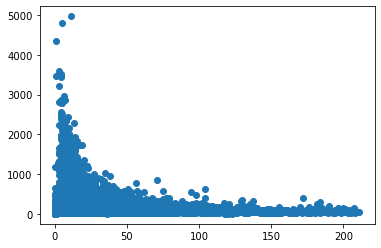

In [43]:
plt.scatter(df7["AVG_DAYS_BETWEEN_PURCHASES"], df7["TOTAL_PURCHASES_EUR"])
plt.show()

In [44]:
KMC = df7[['PURCHASE_COUNT', 'BREAKFAST_PURCHASES',
       'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES',
       'TOTAL_PURCHASES_EUR','MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'AVERAGE_DELIVERY_DISTANCE_KMS', 'General merchandise', 'Grocery',
       'Pet supplies', 'Retail store', 'AMERICAN', 'CHINESE',
       'JAPANESE', 'ITALIAN', 'HAWAIIAN', 'INDIAN', 'MEXICAN', 'NEPALESE',
       'KOREAN', 'MIDDLE_EASTERN', 'THAI', 'VIETNAMESE', 'GREEK',
       'REG_COUNTRY', 'DEVICE', 'PAYMENT']]
KMC = pd.DataFrame(KMC)
KMC.head()

,PURCHASE_COUNT,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,TOTAL_PURCHASES_EUR,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,...,MEXICAN,NEPALESE,KOREAN,MIDDLE_EASTERN,THAI,VIETNAMESE,GREEK,REG_COUNTRY,DEVICE,PAYMENT
1,1,0.0,1.0,0.0,0.0,38.456,23.0,2.0,0.0,6.853,...,0,0,0,0,0,0,0,18,1,0
2,19,0.0,4.0,1.0,14.0,631.488,21.0,2.0,9.0,6.559,...,0,0,0,0,0,0,0,15,1,1
7,1,0.0,0.0,1.0,0.0,19.228,5.0,1.0,0.0,1.251,...,0,0,0,0,0,0,0,18,1,1
12,19,0.0,8.0,0.0,11.0,587.972,7.0,3.0,11.0,3.303,...,0,0,0,0,0,0,0,18,2,1
13,2,0.0,1.0,1.0,0.0,118.404,5.0,6.0,10.0,1.382,...,0,0,0,0,0,0,0,18,2,0


In [45]:
corr = KMC.corr()
corr.style.background_gradient(cmap='coolwarm') #The correlation after removing highly correlated data

,PURCHASE_COUNT,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,TOTAL_PURCHASES_EUR,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Retail store,AMERICAN,CHINESE,JAPANESE,ITALIAN,HAWAIIAN,INDIAN,MEXICAN,NEPALESE,KOREAN,MIDDLE_EASTERN,THAI,VIETNAMESE,GREEK,REG_COUNTRY,PAYMENT
PURCHASE_COUNT,1.000000,0.465443,0.874946,0.511022,0.825401,0.874764,-0.004477,-0.006336,-0.051322,-0.017401,0.230255,0.642182,0.489486,0.705453,0.295142,0.095420,0.175149,0.270079,0.091143,0.122339,0.238254,0.027242,0.056898,0.164825,0.177555,0.064637,0.068286,0.027233,0.095472
BREAKFAST_PURCHASES,0.465443,1.000000,0.477598,0.187389,0.157426,0.301430,-0.010139,0.010452,-0.029395,-0.009161,0.058049,0.292777,0.198488,0.328999,0.065874,0.016559,0.031178,0.057403,0.000605,0.031837,0.065193,0.012964,0.010088,0.047012,0.025992,0.001991,0.004414,0.106124,0.058395
LUNCH_PURCHASES,0.874946,0.477598,1.000000,0.305422,0.506643,0.709127,-0.001072,-0.000934,-0.053728,-0.009725,0.165311,0.572011,0.434710,0.605843,0.222278,0.063770,0.121893,0.205769,0.072386,0.096345,0.188568,0.020034,0.027588,0.146306,0.167375,0.037303,0.061622,0.070149,0.087375
EVENING_PURCHASES,0.511022,0.187389,0.305422,1.000000,0.318505,0.321330,-0.010605,-0.010166,-0.041500,-0.007533,0.103857,0.302459,0.216078,0.382972,0.117101,0.037933,0.023056,0.094462,-0.004934,0.014321,0.073334,0.012305,0.002018,0.057749,0.034858,-0.002849,0.023627,0.218137,0.070098
DINNER_PURCHASES,0.825401,0.157426,0.506643,0.318505,1.000000,0.850146,-0.001896,-0.010273,-0.026055,-0.020307,0.244321,0.529878,0.414474,0.586113,0.308378,0.110547,0.213720,0.284601,0.111105,0.135354,0.244745,0.027349,0.084542,0.147368,0.166788,0.092723,0.064393,-0.121838,0.063731
TOTAL_PURCHASES_EUR,0.874764,0.301430,0.709127,0.321330,0.850146,1.000000,0.005797,-0.009486,-0.020517,-0.014450,0.262526,0.562839,0.425966,0.618708,0.309381,0.094899,0.232373,0.283687,0.132642,0.140546,0.260856,0.029106,0.095504,0.157819,0.190680,0.082663,0.068155,-0.115587,0.089755
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,-0.004477,-0.010139,-0.001072,-0.010605,-0.001896,0.005797,1.000000,-0.000885,0.006609,0.000595,0.012655,-0.004876,0.000071,-0.001580,-0.005388,0.011441,0.012889,0.002709,-0.012379,-0.000692,0.000574,0.001607,-0.008209,-0.011501,-0.002738,0.003154,-0.013152,-0.001754,0.008866
MOST_COMMON_WEEKDAY_TO_PURCHASE,-0.006336,0.010452,-0.000934,-0.010166,-0.010273,-0.009486,-0.000885,1.000000,-0.003665,0.000128,-0.010838,-0.017283,-0.008600,0.006736,-0.001943,0.008332,-0.013845,-0.015047,0.012744,-0.005872,0.000668,-0.018642,0.000965,-0.008658,0.000159,0.003400,0.012292,0.008623,0.000458
AVG_DAYS_BETWEEN_PURCHASES,-0.051322,-0.029395,-0.053728,-0.041500,-0.026055,-0.020517,0.006609,-0.003665,1.000000,0.010959,0.003468,-0.068804,-0.061968,-0.062063,0.018194,-0.012873,0.032098,0.011275,-0.004415,0.013937,-0.016623,-0.007653,0.012036,-0.002007,-0.016166,0.014145,-0.010937,-0.060042,0.014094
AVERAGE_DELIVERY_DISTANCE_KMS,-0.017401,-0.009161,-0.009725,-0.007533,-0.020307,-0.014450,0.000595,0.000128,0.010959,1.000000,0.000072,-0.012336,-0.010095,-0.010270,-0.003687,-0.001893,-0.009431,-0.014283,-0.002799,-0.006942,-0.011274,0.003024,0.008239,-0.004222,0.002863,-0.001404,0.001230,-0.007194,-0.006183


In [46]:
# Normalizing the data before performing the K-means clustering
# copy the data
KMC_COPY = KMC.copy()
KMC2 = KMC_COPY.astype(float)

# apply normalization techniques
for column in KMC2.columns:
    KMC2[column] = (KMC2[column] - KMC2[column].min()) / (KMC2[column].max() - KMC2[column].min()) 
    
KMC2.shape

(12026, 30)

In [47]:
l = pd.DataFrame(np.isfinite(KMC2).all(1))

l.columns = ["Error"]

l.head()

,Error
1,True
2,True
7,True
12,True
13,True


In [48]:
l.shape

(12026, 1)

In [49]:
def Error_Category(df):
    df["Error"] = df.Error.replace({True: 1, False: 0})
    return df

Error_Category(l)

,Error
1,1
2,1
7,1
12,1
13,1
...,...
21973,1
21975,1
21976,1
21978,1


In [50]:
print(l.sort_values(by=['Error'])) # the index 20,972 will be removed after cleaning the normalized data, hence this will be removed from the original data set too.

       Error
20972      0
1          1
14763      1
14764      1
14767      1
...      ...
7536       1
7537       1
7538       1
7518       1
21982      1

[12026 rows x 1 columns]


In [51]:
KMC['Error3'] = l['Error']

KMC.drop(index=20972, inplace=True) 

KMC.drop(columns='Error3', inplace=True)

In [52]:
def clean_dataset(df):
     assert isinstance(df, pd.DataFrame)
     df.dropna(inplace=True)
     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
     return df[indices_to_keep].astype(np.float)

KMC3 = clean_dataset(KMC2)

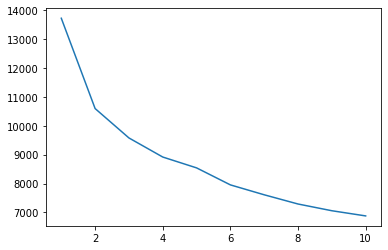

In [53]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(KMC3)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [54]:
k_mean = KMeans(n_clusters=2)
k_mean.fit(KMC3)
identified_cluster = k_mean.fit_predict(KMC3)
KMC['Cluster 2'] = identified_cluster
k_mean.inertia_

10599.163860474435

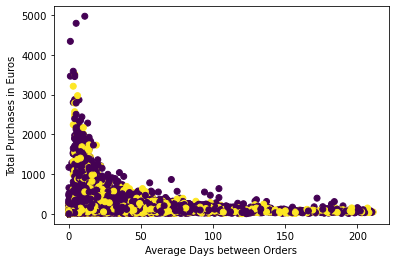

In [55]:
plt.scatter(KMC["AVG_DAYS_BETWEEN_PURCHASES"], KMC["TOTAL_PURCHASES_EUR"], c=KMC["Cluster 2"])
plt.xlabel("Average Days between Orders")
plt.ylabel("Total Purchases in Euros")
plt.show()

In [56]:
k_mean = KMeans(n_clusters=3)
k_mean.fit(KMC3)
identified_cluster = k_mean.fit_predict(KMC3)
KMC['Cluster 3'] = identified_cluster
k_mean.inertia_

9580.736827968474

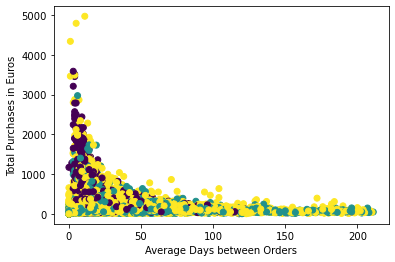

In [57]:
plt.scatter(KMC["AVG_DAYS_BETWEEN_PURCHASES"], KMC["TOTAL_PURCHASES_EUR"], c=KMC["Cluster 3"])
plt.xlabel("Average Days between Orders")
plt.ylabel("Total Purchases in Euros")
plt.show()

In [58]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(KMC3)
identified_cluster = k_mean.fit_predict(KMC3)
KMC['Cluster 5'] = identified_cluster
k_mean.inertia_

8342.254727489979

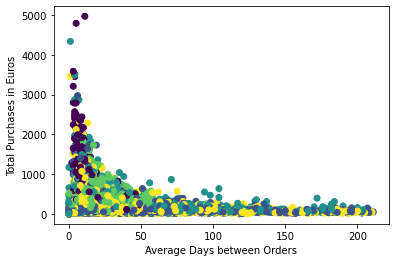

In [59]:
plt.scatter(KMC["AVG_DAYS_BETWEEN_PURCHASES"], KMC["TOTAL_PURCHASES_EUR"], c=KMC["Cluster 5"])
plt.xlabel("Average Days between Orders")
plt.ylabel("Total Purchases in Euros")
plt.show()

In [60]:
## RFM ANALYSIS FOR CUSTOMER SEGMENTATION....

RFM = df7E[['USER_ID', 'AVG_DAYS_BETWEEN_PURCHASES', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR']]

In [61]:
RFM['RECENCY'] = RFM['AVG_DAYS_BETWEEN_PURCHASES']
RFM['FREQUENCY'] = RFM['PURCHASE_COUNT']
RFM['MONETARY_VALUE'] = RFM['TOTAL_PURCHASES_EUR']

In [62]:
RFM['Recency_rank'] = RFM['RECENCY'].rank(ascending=False)
RFM['Frequency_rank'] = RFM['FREQUENCY'].rank(ascending=True)
RFM['Monetary_rank'] = RFM['MONETARY_VALUE'].rank(ascending=True)
RFM.head()

,USER_ID,AVG_DAYS_BETWEEN_PURCHASES,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,RECENCY,FREQUENCY,MONETARY_VALUE,Recency_rank,Frequency_rank,Monetary_rank
1,2,0.0,1,38.456,0.0,1,38.456,9891.0,2090.0,3602.0
2,3,9.0,19,631.488,9.0,19,631.488,6702.0,11164.5,11380.0
7,8,0.0,1,19.228,0.0,1,19.228,9891.0,2090.0,1411.5
12,13,11.0,19,587.972,11.0,19,587.972,6419.5,11164.5,11287.0
13,14,10.0,2,118.404,10.0,2,118.404,6564.0,5090.0,7544.0


In [63]:
# normalizing the rank of the customers
RFM['Normalized_Recency_rank'] = (RFM['Recency_rank']/RFM['Recency_rank'].max())*100
RFM['Normalized_Frequency_rank'] = (RFM['Frequency_rank']/RFM['Frequency_rank'].max())*100
RFM['Normalized_Monetary_rank'] = (RFM['Monetary_rank']/RFM['Monetary_rank'].max())*100

In [64]:
RFM['RFM_Score'] = 0.2*RFM['Normalized_Recency_rank'] + 0.3*RFM['Normalized_Frequency_rank'] +0.5*RFM['Normalized_Monetary_rank']
RFM['RFM_Score'] *= 0.05
RFM = RFM.round(2)
RFM.head()

,USER_ID,AVG_DAYS_BETWEEN_PURCHASES,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,RECENCY,FREQUENCY,MONETARY_VALUE,Recency_rank,Frequency_rank,Monetary_rank,Normalized_Recency_rank,Normalized_Frequency_rank,Normalized_Monetary_rank,RFM_Score
1,2,0.0,1,38.46,0.0,1,38.46,9891.0,2090.0,3602.0,100.00,17.38,29.95,2.01
2,3,9.0,19,631.49,9.0,19,631.49,6702.0,11164.5,11380.0,67.76,92.84,94.63,4.44
7,8,0.0,1,19.23,0.0,1,19.23,9891.0,2090.0,1411.5,100.00,17.38,11.74,1.55
12,13,11.0,19,587.97,11.0,19,587.97,6419.5,11164.5,11287.0,64.90,92.84,93.85,4.39
13,14,10.0,2,118.40,10.0,2,118.40,6564.0,5090.0,7544.0,66.36,42.32,62.73,2.87


In [65]:
RFM["CUSTOMER_SEG"] = np.where(RFM['RFM_Score'] > 4.5, "Top Customers", (np.where(RFM['RFM_Score'] > 4,"High value Customer",(np.where(RFM['RFM_Score'] > 3,"Medium Value Customer",np.where(RFM['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))

CUS_SEG = RFM[['USER_ID','CUSTOMER_SEG', 'AVG_DAYS_BETWEEN_PURCHASES', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR', 'RFM_Score']]

Customer = CUS_SEG.groupby(['CUSTOMER_SEG'])['CUSTOMER_SEG'].count()
print(Customer)

CUSTOMER_SEG
High value Customer      1054
Lost Customers           1822
Low Value Customers      6270
Medium Value Customer    2544
Top Customers             336
Name: CUSTOMER_SEG, dtype: int64


<AxesSubplot:>

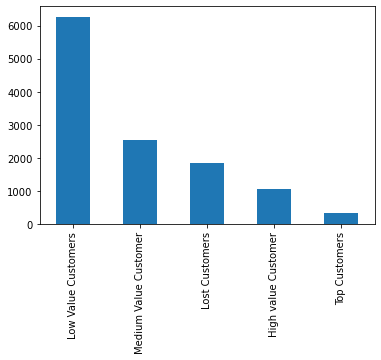

In [66]:
CUS_SEG['CUSTOMER_SEG'].value_counts().plot(kind='bar')

In [67]:
def RFM_CG_Category(df,col):
    df["RFM_CLUSTER"] = df[col].map({
       "High value Customer": 1, "Lost Customers": 2, "Low Value Customers": 3, "Medium Value Customer": 4, "Top Customers": 5})
    return df

RFM_CG_Category(CUS_SEG,"CUSTOMER_SEG")
CUS_SEG.head()

,USER_ID,CUSTOMER_SEG,AVG_DAYS_BETWEEN_PURCHASES,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,RFM_Score,RFM_CLUSTER
1,2,Low Value Customers,0.0,1,38.46,2.01,3
2,3,High value Customer,9.0,19,631.49,4.44,1
7,8,Lost Customers,0.0,1,19.23,1.55,2
12,13,High value Customer,11.0,19,587.97,4.39,1
13,14,Low Value Customers,10.0,2,118.40,2.87,3


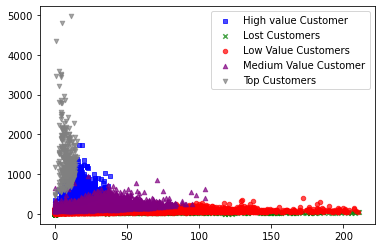

In [68]:
fig7 = category_scatter(x='AVG_DAYS_BETWEEN_PURCHASES', y='TOTAL_PURCHASES_EUR', label_col='CUSTOMER_SEG', 
                       data=CUS_SEG, legend_loc='upper right')

In [69]:
## K- MEANS ANALYSIS WITH RFM FEATURES.....

RFM_KM = CUS_SEG[['AVG_DAYS_BETWEEN_PURCHASES', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR']]

In [70]:
# Normalizing the data before performing the K-means clustering
# copy the data
RFM_KM_COPY = RFM_KM.copy()
RFM_KM_2 = RFM_KM_COPY.astype(float)

# apply normalization techniques
for column in RFM_KM_2.columns:
    RFM_KM_2[column] = (RFM_KM_2[column] - RFM_KM_2[column].min()) / (RFM_KM_2[column].max() - RFM_KM_2[column].min()) 
    
RFM_KM_2.shape

(12026, 3)

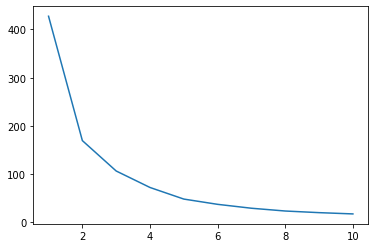

In [71]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(RFM_KM_2)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [72]:
k_mean = KMeans(n_clusters=2)
k_mean.fit(RFM_KM_2)
identified_cluster_RFM = k_mean.fit_predict(RFM_KM_2)
RFM_KM['Cluster 2'] = identified_cluster_RFM
k_mean.inertia_

169.54914032058286

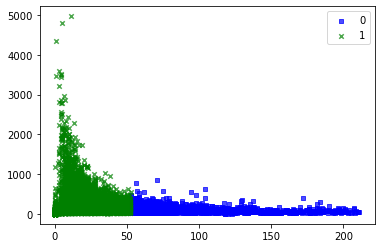

In [73]:
fig8 = category_scatter(x='AVG_DAYS_BETWEEN_PURCHASES', y='TOTAL_PURCHASES_EUR', label_col='Cluster 2', 
                       data=RFM_KM, legend_loc='upper right')

In [74]:
k_mean = KMeans(n_clusters=3)
k_mean.fit(RFM_KM_2)
identified_cluster_RFM = k_mean.fit_predict(RFM_KM_2)
RFM_KM['Cluster 3'] = identified_cluster_RFM
k_mean.inertia_

106.51831816193918

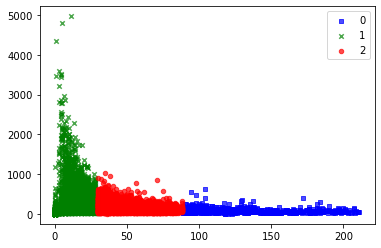

In [75]:
fig8 = category_scatter(x='AVG_DAYS_BETWEEN_PURCHASES', y='TOTAL_PURCHASES_EUR', label_col='Cluster 3', 
                       data=RFM_KM, legend_loc='upper right')

In [76]:
k_mean = KMeans(n_clusters=4)
k_mean.fit(RFM_KM_2)
identified_cluster_RFM = k_mean.fit_predict(RFM_KM_2)
RFM_KM['Cluster 4'] = identified_cluster_RFM
k_mean.inertia_

72.33633754452833

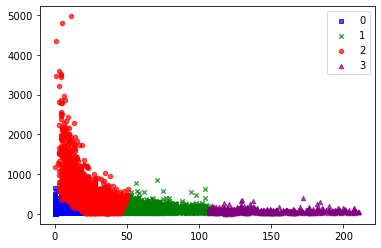

In [77]:
fig9 = category_scatter(x='AVG_DAYS_BETWEEN_PURCHASES', y='TOTAL_PURCHASES_EUR', label_col='Cluster 4', 
                       data=RFM_KM, legend_loc='upper right')

In [78]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(RFM_KM_2)
identified_cluster_RFM = k_mean.fit_predict(RFM_KM_2)
RFM_KM['Cluster 5'] = identified_cluster_RFM
k_mean.inertia_

48.292816348645516

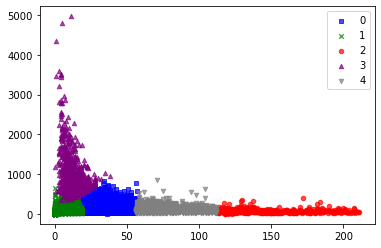

In [79]:
fig10 = category_scatter(x='AVG_DAYS_BETWEEN_PURCHASES', y='TOTAL_PURCHASES_EUR', label_col='Cluster 5', 
                       data=RFM_KM, legend_loc='upper right')

In [80]:
## CUSTOMER SEGMENTATION INSIGHTS - RFM Findings...
CUS_SEG.head()

,USER_ID,CUSTOMER_SEG,AVG_DAYS_BETWEEN_PURCHASES,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,RFM_Score,RFM_CLUSTER
1,2,Low Value Customers,0.0,1,38.46,2.01,3
2,3,High value Customer,9.0,19,631.49,4.44,1
7,8,Lost Customers,0.0,1,19.23,1.55,2
12,13,High value Customer,11.0,19,587.97,4.39,1
13,14,Low Value Customers,10.0,2,118.40,2.87,3


In [81]:
RECENCY_MEAN = CUS_SEG['AVG_DAYS_BETWEEN_PURCHASES'].groupby(CUS_SEG['CUSTOMER_SEG']).mean()
print(RECENCY_MEAN)

CUSTOMER_SEG
High value Customer      17.473435
Lost Customers           17.752470
Low Value Customers      31.368740
Medium Value Customer    33.656447
Top Customers             8.324405
Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: float64


<AxesSubplot:xlabel='CUSTOMER_SEG'>

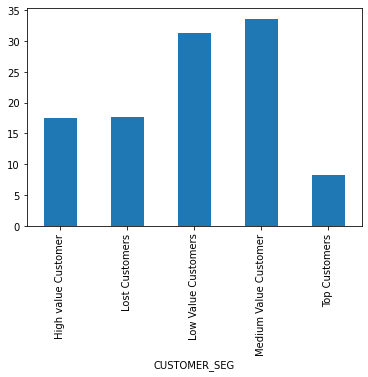

In [82]:
CUS_SEG['AVG_DAYS_BETWEEN_PURCHASES'].groupby(CUS_SEG['CUSTOMER_SEG']).mean().plot(kind='bar')

In [83]:
FREQUENCY_MEAN = CUS_SEG['PURCHASE_COUNT'].groupby(CUS_SEG['CUSTOMER_SEG']).mean()
print(FREQUENCY_MEAN)

CUSTOMER_SEG
High value Customer      19.941176
Lost Customers            1.209111
Low Value Customers       2.197289
Medium Value Customer     7.781053
Top Customers            49.145833
Name: PURCHASE_COUNT, dtype: float64


<AxesSubplot:xlabel='CUSTOMER_SEG'>

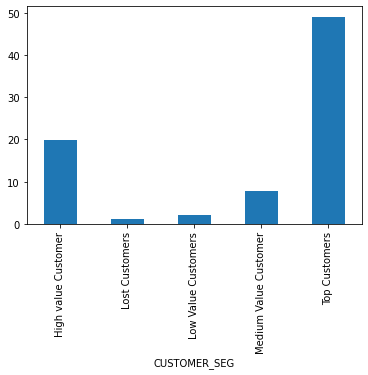

In [84]:
CUS_SEG['PURCHASE_COUNT'].groupby(CUS_SEG['CUSTOMER_SEG']).mean().plot(kind='bar')

In [85]:
MONETORY_MEAN = CUS_SEG['TOTAL_PURCHASES_EUR'].groupby(CUS_SEG['CUSTOMER_SEG']).mean()
print(MONETORY_MEAN)

CUSTOMER_SEG
High value Customer       566.033567
Lost Customers             16.403540
Low Value Customers        66.595069
Medium Value Customer     240.178998
Top Customers            1337.336875
Name: TOTAL_PURCHASES_EUR, dtype: float64


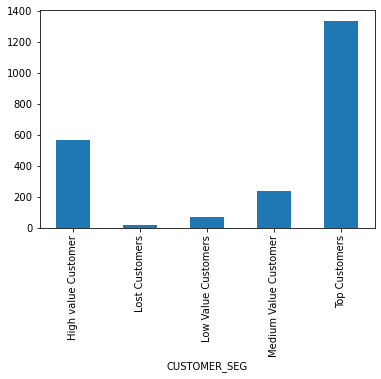

In [86]:
MONETORY_MEAN = CUS_SEG['TOTAL_PURCHASES_EUR'].groupby(CUS_SEG['CUSTOMER_SEG']).mean().plot(kind='bar')

In [87]:
## CUSTOMER SEGMENTATION INSIGHTS - K-Means Clustering with RFM Features Findings...
RFM_KM.head()

,AVG_DAYS_BETWEEN_PURCHASES,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,Cluster 2,Cluster 3,Cluster 4,Cluster 5
1,0.0,1,38.46,1,1,0,1
2,9.0,19,631.49,1,1,2,3
7,0.0,1,19.23,1,1,0,1
12,11.0,19,587.97,1,1,2,3
13,10.0,2,118.40,1,1,0,1


In [88]:
# As per the plots based on the different number of clusters, as the ideal cluster, k = 4 was chosen.
RECENCY_K_MEAN = RFM_KM['AVG_DAYS_BETWEEN_PURCHASES'].groupby(RFM_KM['Cluster 4']).mean()
print(RECENCY_K_MEAN)

Cluster 4
0      1.957496
1     70.321096
2     26.415953
3    142.821490
Name: AVG_DAYS_BETWEEN_PURCHASES, dtype: float64


<AxesSubplot:xlabel='Cluster 4'>

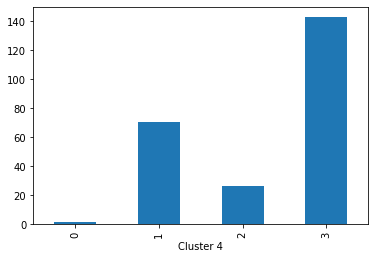

In [89]:
RFM_KM['AVG_DAYS_BETWEEN_PURCHASES'].groupby(RFM_KM['Cluster 4']).mean().plot(kind='bar')

In [90]:
FREQUENCY_K_MEAN = RFM_KM['PURCHASE_COUNT'].groupby(RFM_KM['Cluster 4']).mean()
print(FREQUENCY_K_MEAN)

Cluster 4
0     1.811993
1     4.124327
2    14.257227
3     2.324090
Name: PURCHASE_COUNT, dtype: float64


<AxesSubplot:xlabel='Cluster 4'>

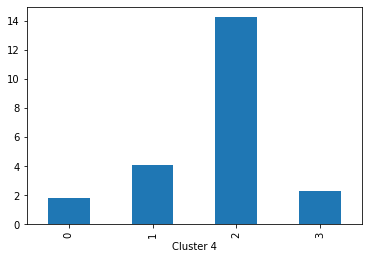

In [91]:
RFM_KM['PURCHASE_COUNT'].groupby(RFM_KM['Cluster 4']).mean().plot(kind='bar')

In [92]:
MONETARY_K_MEAN = RFM_KM['TOTAL_PURCHASES_EUR'].groupby(RFM_KM['Cluster 4']).mean()
print(MONETARY_K_MEAN)

Cluster 4
0     49.351982
1    134.478116
2    402.520359
3     79.753345
Name: TOTAL_PURCHASES_EUR, dtype: float64


<AxesSubplot:xlabel='Cluster 4'>

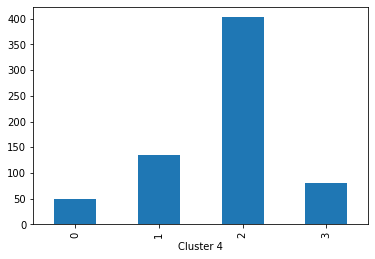

In [93]:
RFM_KM['TOTAL_PURCHASES_EUR'].groupby(RFM_KM['Cluster 4']).mean().plot(kind='bar')

In [94]:
RFM_KM.groupby(['Cluster 4'])['Cluster 4'].count()

Cluster 4
0    5670
1    2043
2    3736
3     577
Name: Cluster 4, dtype: int64